In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv( r'powerconsumption.csv')


In [3]:
train_df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [5]:
train_df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [6]:
train_df_modified=train_df.drop(['PowerConsumption_Zone2','PowerConsumption_Zone3'],axis=1)

In [7]:
train_df_modified.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620


In [15]:
train_df_modified=train_df_modified.rename(columns={ 'PowerConsumption_Zone1': 'TotalPowerConsumption'})

In [ ]:
# Time series plot for PowerConsumption
#used to visualize data points over a time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Datetime', y='TotalPowerConsumption', data=train_df_modified, label='Power Zone')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.show()

In [17]:
train_df_modified['Datetime']=pd.to_datetime(train_df_modified.Datetime)
train_df_modified.sort_values(by='Datetime', ascending=True, inplace=True)

chronological_order = train_df_modified['Datetime'].is_monotonic_increasing

In [19]:
chronological_order

True

In [21]:
train_df_modified.isna().sum()

Datetime                 0
Temperature              0
Humidity                 0
WindSpeed                0
GeneralDiffuseFlows      0
DiffuseFlows             0
TotalPowerConsumption    0
dtype: int64

In [23]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['day'] = df.index.month
    df['year'] = df.index.year
    df['season'] = df['month'] % 12 // 3 + 1
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week

    # Additional features
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['is_month_start'] = (df['dayofmonth'] == 1).astype(int)
    df['is_month_end'] = (df['dayofmonth'] == df.index.days_in_month).astype(int)
    df['is_quarter_start'] = (df['dayofmonth'] == 1) & (df['month'] % 3 == 1).astype(int)
    df['is_quarter_end'] = (df['dayofmonth'] == df.groupby(['year', 'quarter'])['dayofmonth'].transform('max'))

    # Additional features
    df['is_working_day'] = df['dayofweek'].isin([0, 1, 2, 3, 4]).astype(int)
    df['is_business_hours'] = df['hour'].between(9, 17).astype(int)
    df['is_peak_hour'] = df['hour'].isin([8, 12, 18]).astype(int)

    # Minute-level features
    df['minute_of_day'] = df['hour'] * 60 + df['minute']
    df['minute_of_week'] = (df['dayofweek'] * 24 * 60) + df['minute_of_day']

    return df.astype(float)

In [25]:
df = train_df_modified.set_index('Datetime')
df = create_features(df)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,TotalPowerConsumption,hour,minute,dayofweek,quarter,...,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_working_day,is_business_hours,is_peak_hour,minute_of_day,minute_of_week
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,0.0,0.0,6.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8640.0
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,0.0,10.0,6.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,8650.0
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,0.0,20.0,6.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,8660.0
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,0.0,30.0,6.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,8670.0
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,0.0,40.0,6.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0,8680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,23.0,10.0,5.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1390.0,8590.0
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,23.0,20.0,5.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0,8600.0
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,23.0,30.0,5.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1410.0,8610.0


In [27]:

df[[ 'year', 'month', 'day','minute', 'dayofyear', 'weekofyear', 'quarter', 'season']].head()


,year,month,day,minute,dayofyear,weekofyear,quarter,season
Datetime,,,,,,,,
2017-01-01 00:00:00,2017.0,1.0,1.0,0.0,1.0,52.0,1.0,1.0
2017-01-01 00:10:00,2017.0,1.0,1.0,10.0,1.0,52.0,1.0,1.0
2017-01-01 00:20:00,2017.0,1.0,1.0,20.0,1.0,52.0,1.0,1.0
2017-01-01 00:30:00,2017.0,1.0,1.0,30.0,1.0,52.0,1.0,1.0
2017-01-01 00:40:00,2017.0,1.0,1.0,40.0,1.0,52.0,1.0,1.0


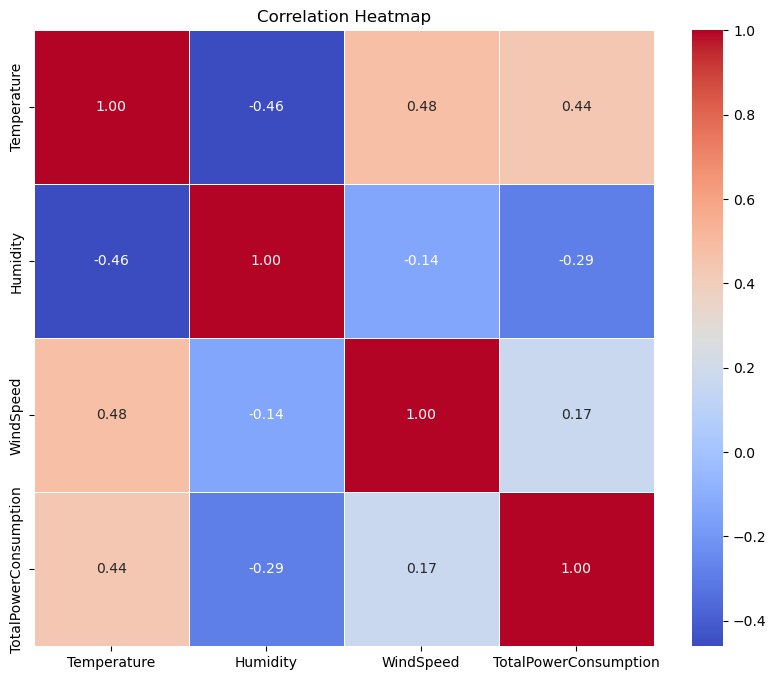

In [29]:
correlation_matrix = df[['Temperature', 'Humidity', 'WindSpeed', 'TotalPowerConsumption']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            52416 non-null  float64
 1   Humidity               52416 non-null  float64
 2   WindSpeed              52416 non-null  float64
 3   GeneralDiffuseFlows    52416 non-null  float64
 4   DiffuseFlows           52416 non-null  float64
 5   TotalPowerConsumption  52416 non-null  float64
 6   hour                   52416 non-null  float64
 7   minute                 52416 non-null  float64
 8   dayofweek              52416 non-null  float64
 9   quarter                52416 non-null  float64
 10  month                  52416 non-null  float64
 11  day                    52416 non-null  float64
 12  year                   52416 non-null  float64
 13  season                 52416 non-null  float64
 14  dayofyear          

In [31]:
swp_list=['Temperature','Humidity','WindSpeed','DiffuseFlows','GeneralDiffuseFlows','hour','minute','dayofweek','quarter','month','day','year','season','dayofyear','dayofmonth','weekofyear','is_weekend','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_working_day','is_business_hours','is_peak_hour','minute_of_day','minute_of_week','TotalPowerConsumption']

In [35]:
df = df.reindex(columns=swp_list)


In [37]:
df.head()

,Temperature,Humidity,WindSpeed,DiffuseFlows,GeneralDiffuseFlows,hour,minute,dayofweek,quarter,month,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_working_day,is_business_hours,is_peak_hour,minute_of_day,minute_of_week,TotalPowerConsumption
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.119,0.051,0.0,0.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8640.0,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.085,0.070,0.0,10.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,8650.0,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.100,0.062,0.0,20.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,8660.0,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.096,0.091,0.0,30.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,8670.0,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.085,0.048,0.0,40.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0,8680.0,27335.69620


<Axes: ylabel='Temperature'>

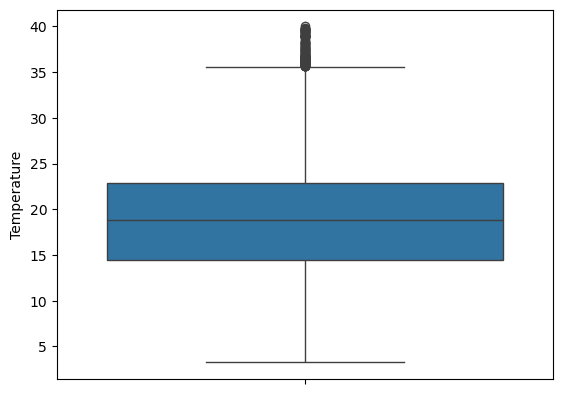

In [39]:
sns.boxplot(df['Temperature'])


In [40]:
df['Temperature'].corr(df.TotalPowerConsumption)

0.4402207890291411

In [43]:
a1=np.where(df['Temperature']>36)[0]
len(a1)


103

<Axes: ylabel='Humidity'>

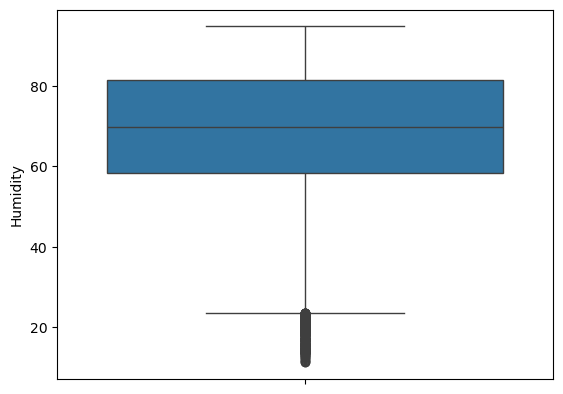

In [45]:
sns.boxplot(df['Humidity'])

In [46]:
a2=np.where(df['Humidity']<20)[0]

In [49]:
df['Humidity'].corr(df.TotalPowerConsumption)

-0.28742060175797435

In [51]:
len(a2)

148

<Axes: ylabel='WindSpeed'>

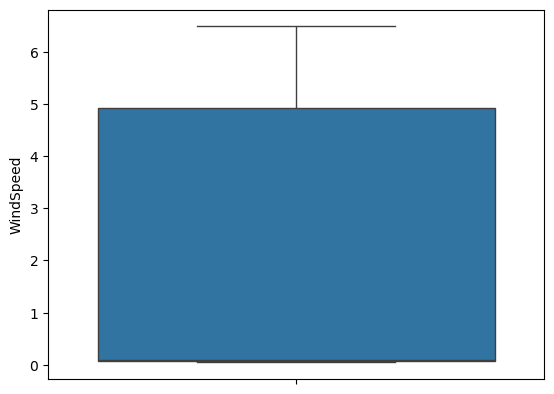

In [53]:
sns.boxplot(df['WindSpeed'])


In [54]:
df['WindSpeed'].corr(df.TotalPowerConsumption)

0.16744407628230537

<Axes: ylabel='GeneralDiffuseFlows'>

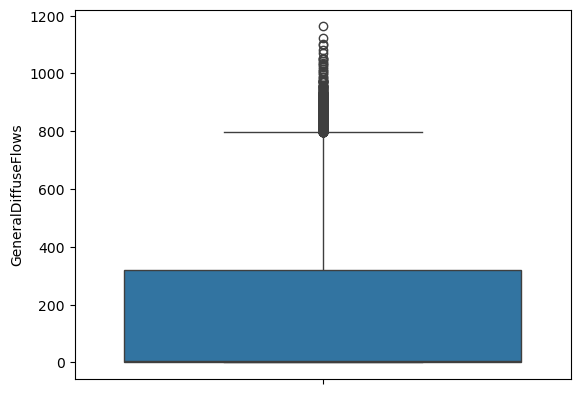

In [57]:
sns.boxplot(df['GeneralDiffuseFlows'])

In [58]:
df['GeneralDiffuseFlows'].corr(df.TotalPowerConsumption)

0.18796459685877193

In [61]:
a3=np.where(df['GeneralDiffuseFlows']>800)[0]
len(a3)

2266

<Axes: ylabel='TotalPowerConsumption'>

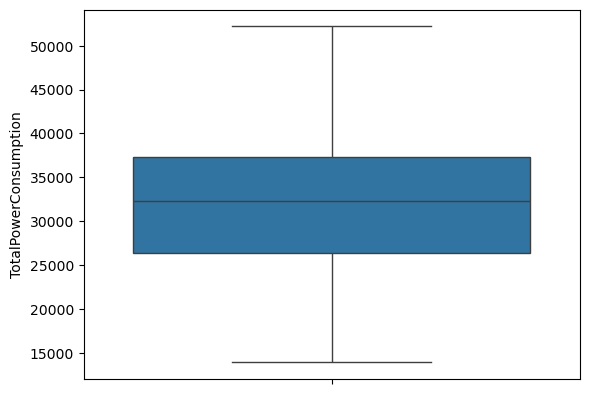

In [63]:
sns.boxplot(df['TotalPowerConsumption'])

In [65]:
df['DiffuseFlows'].corr(df.TotalPowerConsumption)

0.08027390456281468

In [67]:
a4=np.where(df['DiffuseFlows']>201)[0]
len(a4)

6600

<Axes: ylabel='DiffuseFlows'>

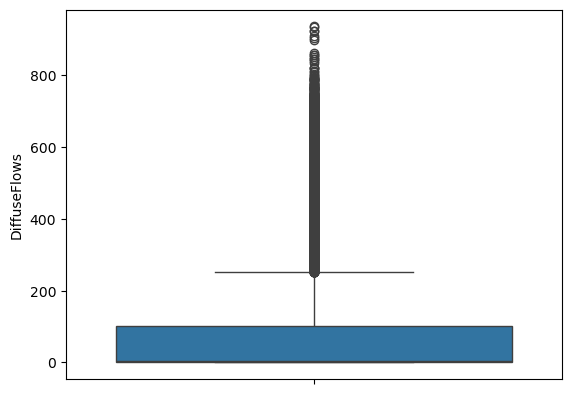

In [69]:
sns.boxplot(df['DiffuseFlows'])

In [71]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [73]:
df.head()

,Temperature,Humidity,WindSpeed,DiffuseFlows,GeneralDiffuseFlows,hour,minute,dayofweek,quarter,month,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_working_day,is_business_hours,is_peak_hour,minute_of_day,minute_of_week,TotalPowerConsumption
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.119,0.051,0.0,0.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8640.0,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.085,0.070,0.0,10.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,8650.0,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.100,0.062,0.0,20.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,8660.0,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.096,0.091,0.0,30.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,8670.0,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.085,0.048,0.0,40.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0,8680.0,27335.69620


In [75]:
from sklearn.model_selection import train_test_split


In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [79]:
X_train.shape

(49795, 26)

In [81]:
y_train.shape


(49795,)

In [83]:
X_test.shape

(2621, 26)

In [85]:
y_test.shape

(2621,)

In [87]:
from sklearn.linear_model import LinearRegression



In [89]:
model = LinearRegression()


In [91]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)


SimpleImputer()

In [93]:
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [95]:
model.fit(X_train_imputed, y_train)


LinearRegression()

In [97]:
predictions = model.predict(X_test_imputed)


In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [109]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [111]:
mse = mean_squared_error(y_test, predictions)


In [113]:
print("Mean Squared Error:", mse)

Mean Squared Error: 17930676.256256923


In [115]:
accuracy = r2_score(y_test, predictions)
accuracy

0.6617245431846654

In [117]:
#KNN

In [119]:
from sklearn.neighbors import KNeighborsRegressor

In [121]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)


In [123]:
knn_regressor.fit(X_train_imputed, y_train)

KNeighborsRegressor()

In [125]:
predictions = knn_regressor.predict(X_test_imputed)


In [126]:
accuracy = r2_score(y_test, predictions)


In [129]:
accuracy


0.9552380403391496

In [131]:
mse = mean_squared_error(predictions, y_test)

In [133]:
mse

2372658.7049219147

In [135]:
from sklearn.svm import SVR

In [137]:
svm_regressor = SVR(kernel='rbf')

In [ ]:
svm_regressor.fit(X_train_imputed, y_train)


In [ ]:
predictions = svm_regressor.predict(X_test_imputed)

In [ ]:
accuracy = r2_score(Y_test, predictions)
accuracy

In [ ]:
# decission tree